# Library Installations

In [2]:
# Library Installations

# !pip install pypyodbc
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn


# Library Imports

In [3]:
# Imports

import pypyodbc as odbc # pip install pypyodbc
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn


# Connecting To Database & Fetching Data

## Creating Connection String

In [4]:
# Connect to database

DRIVER_NAME =   "SQL SERVER"
SERVER_NAME = "LAPTOP-KBAD6AQA\SQLEXPRESS"
DATABASE_NAME = 'Netflix'

connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={{{SERVER_NAME}}};
    DATABASE={{{DATABASE_NAME}}};
    Trust_Connection=yes;
"""


## Establishing A Connection To Database and Fetching Data

In [5]:
try:
    # Establish a connection
    conn = odbc.connect(connection_string)

    # Create a cursor
    cursor = conn.cursor()

    # Example query
    query = "SELECT * FROM Streaming_Data"
    cursor.execute(query)

    # Fetch and print results
    rows = cursor.fetchall()

except odbc.Error as e:
    # Print Error
    print(f"Error: {e}")

finally:
    # Close the connection
    if conn:
        conn.close()

# Creating a Dataframe

In [6]:
# Convert tuples to numpy arrays
arrays = [np.array(row) for row in rows]

# Create a DataFrame from the arrays
columns = ["User_ID", "Session_ID", "Device_ID", "Video_ID", "Duration_Watched_minutes","Genre", "Country", "Age", "Gender", "Subscription_Status", "Ratings", "Languages", "Device_Type", "Location", "Playback_Quality", "Interaction_Events"]
df = pd.DataFrame(arrays, columns=columns)

# Print the DataFrame
print(df.head())

                                User_ID                            Session_ID  \
0  eb4f9229-74df-45f6-baac-cf19241b8b30  cb2142a7-0750-49ed-b8ac-a975fe1ff69a   
1  661d4b59-4328-410a-901c-1e3b4c40c334  3bc0a662-b353-4015-8b0c-55ceb510d13a   
2  dd3fe9e9-ea82-4891-ab93-8a47c80e3251  bd545b4a-9f54-4e87-b9f8-15ae20b44f22   
3  a1b3365b-1d00-4ddf-bc43-02fc9c10c680  0441086d-c59e-478d-a496-5c5b995ecfdb   
4  338d3f91-5f1c-4590-8803-324901826406  0295f01d-7f15-4799-856c-90c688697ef8   

  Device_ID Video_ID Duration_Watched_minutes        Genre  \
0       232       11              90.04452533       Sci-Fi   
1       549       85              68.97347929       Comedy   
2       844       50              42.51134326       Comedy   
3       201       38              53.31666005  Documentary   
4       700       31              69.43778589       Action   

                            Country Age  Gender Subscription_Status Ratings  \
0                             Sudan  56  Female             P

# Cleaning DataFrame

## Getting Rid Of Not Needed Columns

In [7]:
# Getting rid of User_ID, Session_ID, Device_ID, Video_ID columns 
df = df.iloc[:, 4:]

## Checking Data Types Of Columns

In [8]:
for column in df.columns:
    data_type_series = df[column].apply(type)
    unique_data_types = data_type_series.unique()
    print(f"Column: {column}, Unique Data Types: {unique_data_types}")


Column: Duration_Watched_minutes, Unique Data Types: [<class 'numpy.str_'>]
Column: Genre, Unique Data Types: [<class 'numpy.str_'>]
Column: Country, Unique Data Types: [<class 'numpy.str_'>]
Column: Age, Unique Data Types: [<class 'numpy.str_'>]
Column: Gender, Unique Data Types: [<class 'numpy.str_'>]
Column: Subscription_Status, Unique Data Types: [<class 'numpy.str_'>]
Column: Ratings, Unique Data Types: [<class 'numpy.str_'>]
Column: Languages, Unique Data Types: [<class 'numpy.str_'>]
Column: Device_Type, Unique Data Types: [<class 'numpy.str_'>]
Column: Location, Unique Data Types: [<class 'numpy.str_'>]
Column: Playback_Quality, Unique Data Types: [<class 'numpy.str_'>]
Column: Interaction_Events, Unique Data Types: [<class 'numpy.str_'>]


## Converting Columns To the Correct Data Type

In [9]:
# Convert 'Duration_Watched_minutes' column to float
df['Duration_Watched_minutes'] = df['Duration_Watched_minutes'].astype(float)

# Convert 'Age' column to integers
df['Age'] = df['Age'].astype(int)

# Convert 'Ratings' column to integers
df['Ratings'] = df['Ratings'].astype(int)

# Convert 'Interaction_Events' column to integers
df['Interaction_Events'] = df['Interaction_Events'].astype(int)

## Verifying Data Types Changes Of Columns Was Successful

In [10]:
# Iterates Through Columns In Database
for column in df.columns:

    # Gets Data Type of Column
    data_type = df[column].dtype

    # Boolean Statements Display Variable Type & Size Information if Int or Float
    if np.issubdtype(data_type, np.integer):
        int_size = np.iinfo(data_type).bits
        print(f"Column: {column}, Data Type: int{int_size}")
    elif np.issubdtype(data_type, np.floating):
        float_size = np.finfo(data_type).bits
        print(f"Column: {column}, Data Type: float{float_size}")
    else:
        print(f"Column: {column}, Unique Data Types: {df[column].apply(type).unique()}")


Column: Duration_Watched_minutes, Data Type: float64
Column: Genre, Unique Data Types: [<class 'numpy.str_'>]
Column: Country, Unique Data Types: [<class 'numpy.str_'>]
Column: Age, Data Type: int32
Column: Gender, Unique Data Types: [<class 'numpy.str_'>]
Column: Subscription_Status, Unique Data Types: [<class 'numpy.str_'>]
Column: Ratings, Data Type: int32
Column: Languages, Unique Data Types: [<class 'numpy.str_'>]
Column: Device_Type, Unique Data Types: [<class 'numpy.str_'>]
Column: Location, Unique Data Types: [<class 'numpy.str_'>]
Column: Playback_Quality, Unique Data Types: [<class 'numpy.str_'>]
Column: Interaction_Events, Data Type: int32


## Checking For Missing Values within DataSet

In [11]:
# Check for missing values, None, and empty strings
missing_values = df.applymap(lambda x: pd.isna(x) or x is None or x == "" or str(x).strip() == "")

# Identify rows with missing values
rows_with_missing = missing_values.any(axis=1)

# Remove rows with missing values
df = df[~rows_with_missing]

# Display information about the removed rows
removed_rows = df[rows_with_missing]
print(f"Number of removed rows with missing values: {len(removed_rows)}")
print(removed_rows)

Number of removed rows with missing values: 0
Empty DataFrame
Columns: [Duration_Watched_minutes, Genre, Country, Age, Gender, Subscription_Status, Ratings, Languages, Device_Type, Location, Playback_Quality, Interaction_Events]
Index: []


## Checking For Duplicate Rows Within DataSet

In [12]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Identify and print duplicate rows
duplicates = df[duplicate_rows]
print("Duplicate Rows:")
print(duplicates)

# Drop duplicate rows and create a new DataFrame
df = df.drop_duplicates()

# Display information about the cleaned DataFrame
print("DataFrame without Duplicates:")
print(df.head())

Duplicate Rows:
Empty DataFrame
Columns: [Duration_Watched_minutes, Genre, Country, Age, Gender, Subscription_Status, Ratings, Languages, Device_Type, Location, Playback_Quality, Interaction_Events]
Index: []
DataFrame without Duplicates:
   Duration_Watched_minutes        Genre                           Country  \
0                 90.044525       Sci-Fi                             Sudan   
1                 68.973479       Comedy                              Cuba   
2                 42.511343       Comedy                             Japan   
3                 53.316660  Documentary  Lao People's Democratic Republic   
4                 69.437786       Action                        Bangladesh   

   Age  Gender Subscription_Status  Ratings Languages Device_Type  \
0   56  Female             Premium        3   Spanish  Smartphone   
1   52    Male             Premium        3   Chinese     Desktop   
2   14  Female             Premium        3   Spanish      Tablet   
3   36    Male  

## Checking For Outliers Within DataSet

In [13]:
# Define a function to identify outliers based on IQR (Interquartile Range)
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Apply the function to each numeric column in the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32', 'float32']).columns
outliers_df = df[numeric_columns].apply(identify_outliers)

# Display rows with outliers
rows_with_outliers = df[outliers_df.any(axis=1)]
print("Rows with Outliers:")
print(rows_with_outliers)

# Alternatively, you can remove rows with outliers
df = df[~outliers_df.any(axis=1)]
print("DataFrame without Outliers:")
print(df.head())


Rows with Outliers:
Empty DataFrame
Columns: [Duration_Watched_minutes, Genre, Country, Age, Gender, Subscription_Status, Ratings, Languages, Device_Type, Location, Playback_Quality, Interaction_Events]
Index: []
DataFrame without Outliers:
   Duration_Watched_minutes        Genre                           Country  \
0                 90.044525       Sci-Fi                             Sudan   
1                 68.973479       Comedy                              Cuba   
2                 42.511343       Comedy                             Japan   
3                 53.316660  Documentary  Lao People's Democratic Republic   
4                 69.437786       Action                        Bangladesh   

   Age  Gender Subscription_Status  Ratings Languages Device_Type  \
0   56  Female             Premium        3   Spanish  Smartphone   
1   52    Male             Premium        3   Chinese     Desktop   
2   14  Female             Premium        3   Spanish      Tablet   
3   36    Male

# Data Analysis

## Genres Analysis

### Most Highly Rated Genres on Netflix

In [14]:
# Group by 'Genre' and get the 'Ratings' for each group
genre_ratings = df.groupby('Genre')['Ratings'].mean().reset_index()

# Print the DataFrame with genres and their mean ratings
print(genre_ratings)

         Genre   Ratings
0       Action  3.041748
1       Comedy  3.013553
2  Documentary  2.928638
3        Drama  3.016080
4       Sci-Fi  2.962536
5     Thriller  2.965714


### Most Watched Genres on Streaming Application

In [15]:
# Group by 'Genre' and get the mean of 'Duration_Watched_minutes'
genre_ratings = df.groupby('Genre')['Duration_Watched_minutes'].mean().reset_index()

# Print the DataFrame with genres and their mean watch time
print(genre_ratings)

         Genre  Duration_Watched_minutes
0       Action                 60.164136
1       Comedy                 58.563143
2  Documentary                 62.049858
3        Drama                 60.714402
4       Sci-Fi                 59.993830
5     Thriller                 60.741918


### Amount Of Genres On Streaming Application

Amount of Genres On Streaming Application
Documentary    1065
Thriller       1050
Sci-Fi         1041
Comedy         1033
Action         1030
Drama           995
Name: Genre, dtype: int64


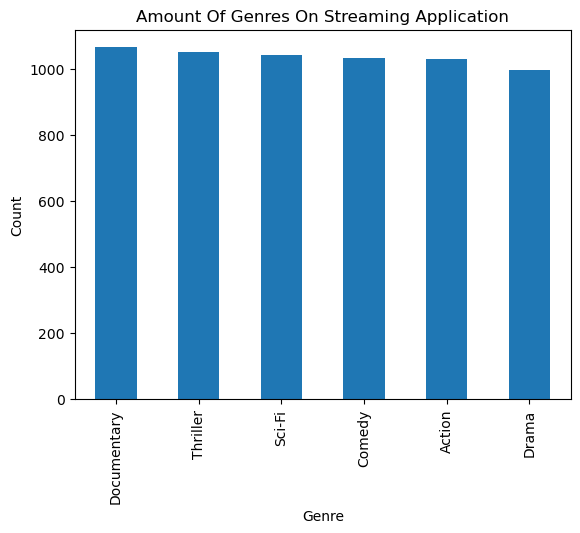

In [16]:
# Counts The Genres in The Column Genre
genre_counts = df['Genre'].value_counts()

# Print The Amount Of Genres On Streaming Application
print("Amount of Genres On Streaming Application")
print(genre_counts)

# Plot The Amount Of Genres On Streaming Application
genre_counts.plot(kind='bar')
plt.title('Amount Of Genres On Streaming Application')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Streaming Application Content Consumption Analysis

### Most Popular Devices Used On Streaming Application

Amount of Device Types On Streaming Application
Smart TV      1306
Desktop       1270
Smartphone    1233
Tablet        1217
Laptop        1188
Name: Device_Type, dtype: int64


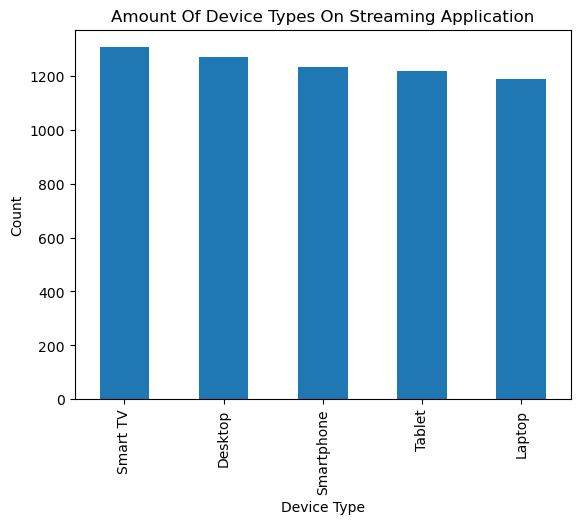

In [17]:
# Counts The Devices Types in The Column Device Type
device_counts = df['Device_Type'].value_counts()

# Print the most popular device types
print("Amount of Device Types On Streaming Application")
print(device_counts)

# Plot the most popular device types
device_counts.plot(kind='bar')
plt.title('Amount Of Device Types On Streaming Application')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

### Most Popular Resolution Used On Streaming Application

Amount of Most Popular Resolution On Streaming Application
4K    2092
SD    2066
HD    2056
Name: Playback_Quality, dtype: int64


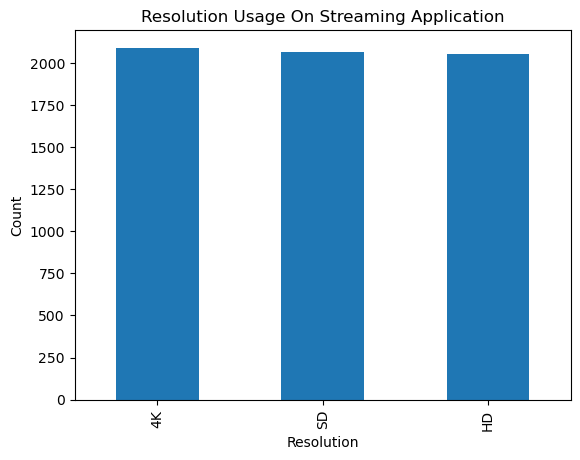

In [18]:
# Counts The Playback Quality in The Column Playback_Quality
playbackQuality_counts = df['Playback_Quality'].value_counts()

# Print the used resolutions
print("Amount of Most Popular Resolution On Streaming Application")
print(playbackQuality_counts)

# Plot the most used resolutions
playbackQuality_counts.plot(kind='bar')
plt.title('Resolution Usage On Streaming Application')
plt.xlabel('Resolution')
plt.ylabel('Count')
plt.show()

### Most Popular Subscription Status Used On Streaming Application

Most Popular Subscription Status On Streaming Application
Free       3111
Premium    3103
Name: Subscription_Status, dtype: int64


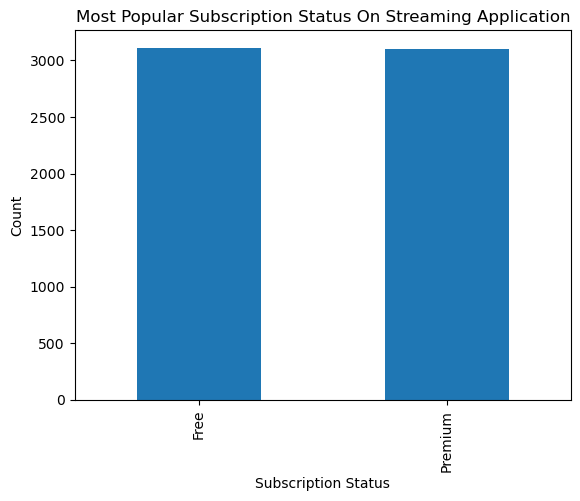

In [19]:
# Counts The Subscription Status in The Column Subscription Status
subscription_status_counts = df['Subscription_Status'].value_counts()

# Print the most popular Subscription Status
print("Most Popular Subscription Status On Streaming Application")
print(subscription_status_counts)

# Plot the most popular Subscription Status
subscription_status_counts.plot(kind='bar')
plt.title('Most Popular Subscription Status On Streaming Application')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

## User Demographics Data Analysis

### Age Analysis

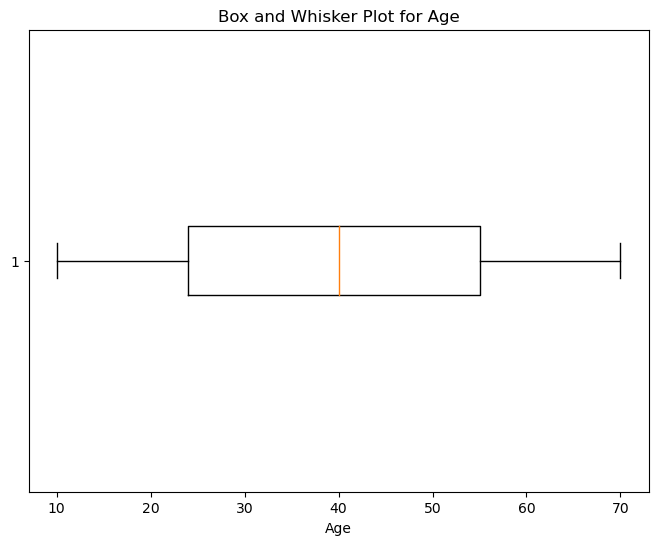

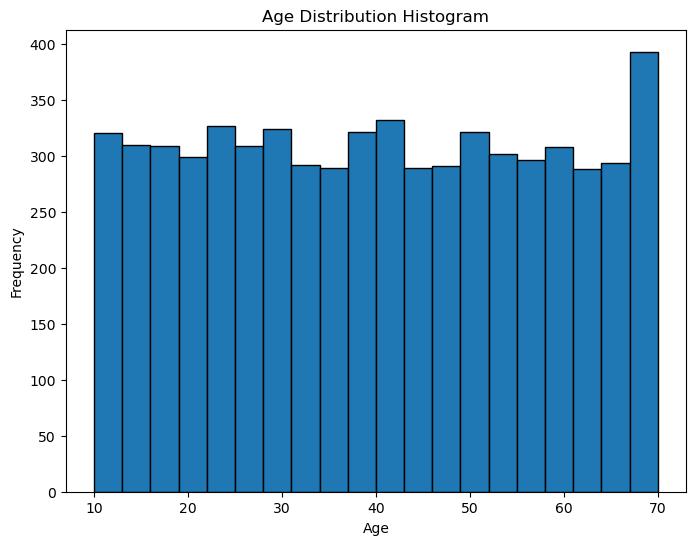

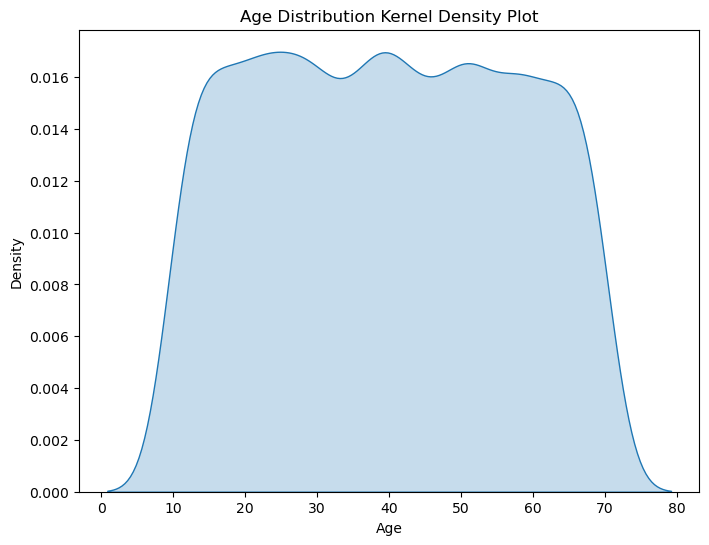

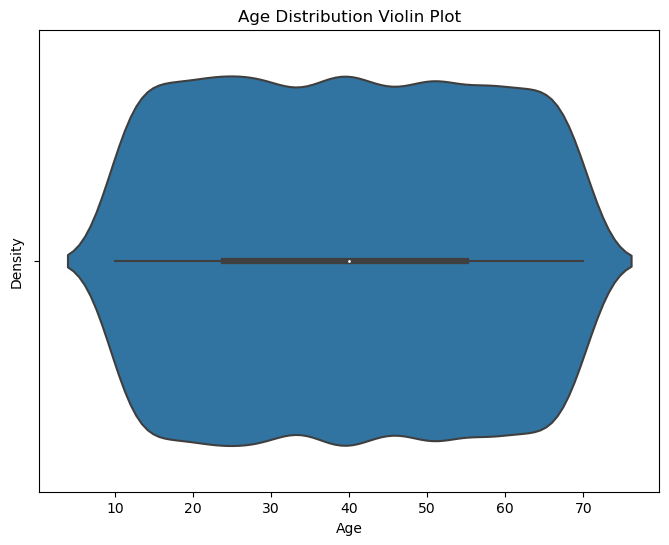

In [20]:
# Box and whisker plot for the "Age" column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)  # 'vert=False' makes the plot horizontal
plt.title('Box and Whisker Plot for Age')
plt.xlabel('Age')
plt.show()

# Histogram for the "Age" column
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Kernel density plot for the "Age" column
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], fill=True)
plt.title('Age Distribution Kernel Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Violin plot for the "Age" column
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Age'])
plt.title('Age Distribution Violin Plot')
plt.xlabel('Age')
plt.ylabel('Density')  # Adding the y-axis label
plt.show()



In [36]:
# Create a new column 'Generation' based on age ranges
age_bins = [11, 26, 42, 58, float('inf')]
generation_labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers']
df['Generation'] = pd.cut(df['Age'], bins=age_bins, labels=generation_labels, right=False)

# Group by 'Generation' and 'Genre' and calculate the average ratings
genre_ratings = df.groupby(['Generation', 'Genre'])['Ratings'].mean().reset_index()
    

# Find the genre with the maximum average rating for each generation
most_liked_genres = genre_ratings.loc[genre_ratings.groupby('Generation')['Ratings'].idxmax()].reset_index(drop=True)

print(most_liked_genres)

     Generation   Genre   Ratings
0         Gen Z  Comedy  3.105263
1   Millennials   Drama  3.121212
2         Gen X  Action  3.178439
3  Baby Boomers   Drama  3.108374


In [37]:
# Create a new column 'Generation' based on age ranges
age_bins = [11, 26, 42, 58, float('inf')]
generation_labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers']
df['Generation'] = pd.cut(df['Age'], bins=age_bins, labels=generation_labels, right=False)

# Group by 'Generation' and 'Genre' and calculate the average watch time
genre_ratings = df.groupby(['Generation', 'Genre'])['Duration_Watched_minutes'].mean().reset_index()
    

# Find the genre with the maximum average watch time for each generation
most_liked_genres = genre_ratings.loc[genre_ratings.groupby('Generation')['Duration_Watched_minutes'].idxmax()].reset_index(drop=True)

print(most_liked_genres)

     Generation        Genre  Duration_Watched_minutes
0         Gen Z        Drama                 61.505089
1   Millennials  Documentary                 63.824370
2         Gen X     Thriller                 62.648353
3  Baby Boomers       Action                 62.689794


Ideas

- Explore the age distribution of Streaming Application users. You can create age groups (e.g., 18-24, 25-34, 35-44, etc.) and determine whether there are any significant differences in content preferences between users within these age groups.

### Gender Analysis

Amount of Men and Women On Streaming Application
Female    3148
Male      3066
Name: Gender, dtype: int64


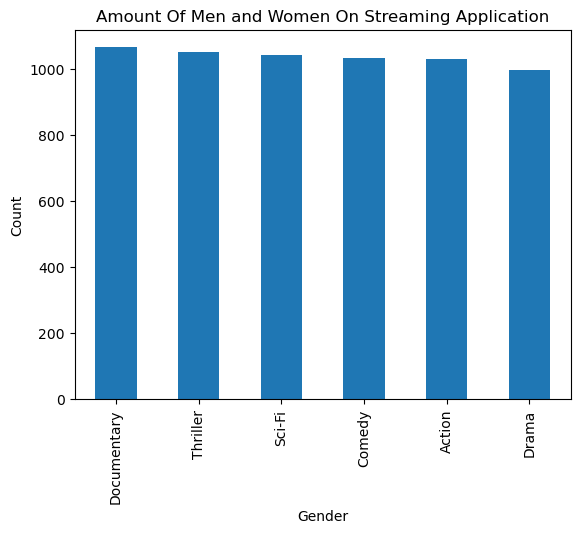

In [22]:
# Counts The Genders in The Column Gender
gender_counts = df['Gender'].value_counts()

# Print the most popular Genders
print("Amount of Men and Women On Streaming Application")
print(gender_counts)

# Plot the most popular Genders
genre_counts.plot(kind='bar')
plt.title('Amount Of Men and Women On Streaming Application')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [23]:
# Group by Gender and Genre, then calculate the mean Ratings
genre_preferences = df.groupby(['Gender', 'Genre'])['Ratings'].mean().reset_index()

print(genre_preferences)

    Gender        Genre   Ratings
0   Female       Action  3.015595
1   Female       Comedy  3.097786
2   Female  Documentary  2.847953
3   Female        Drama  3.012170
4   Female       Sci-Fi  3.060606
5   Female     Thriller  2.942755
6     Male       Action  3.067698
7     Male       Comedy  2.920570
8     Male  Documentary  3.003623
9     Male        Drama  3.019920
10    Male       Sci-Fi  2.861598
11    Male     Thriller  2.991853


In [24]:
# Group by Gender and Genre, then calculate the mean Duration_Watched_minutes
genre_preferences = df.groupby(['Gender', 'Genre'])['Duration_Watched_minutes'].mean().reset_index()

print(genre_preferences)

    Gender        Genre  Duration_Watched_minutes
0   Female       Action                 59.383045
1   Female       Comedy                 59.361204
2   Female  Documentary                 61.076385
3   Female        Drama                 59.768341
4   Female       Sci-Fi                 62.289170
5   Female     Thriller                 61.405633
6     Male       Action                 60.939184
7     Male       Comedy                 57.682186
8     Male  Documentary                 62.954553
9     Male        Drama                 61.643502
10    Male       Sci-Fi                 57.631375
11    Male     Thriller                 59.986284


In [25]:
# Filter the dataset to only have women
women_data = df[df['Gender'] == 'Female']

# Only add the column Subscription Status
women_subscription_status = women_data[['Subscription_Status']]

print(women_subscription_status.value_counts())


Subscription_Status
Free                   1615
Premium                1533
dtype: int64


In [26]:
# Filter the dataset to only have women
men_data = df[df['Gender'] == 'Male']

# Only add the column Subscription Status
men_subscription_status = men_data[['Subscription_Status']]

print(men_subscription_status.value_counts())


Subscription_Status
Premium                1570
Free                   1496
dtype: int64


Ideas

- Investigate the gender distribution of Streaming Application users. Determine whether there are any significant differences in content preferences between male and female users.

## Geographic Trends

Country
Afghanistan               Comedy
Albania                   Comedy
Algeria                   Comedy
American Samoa       Documentary
Andorra                   Sci-Fi
                        ...     
Wallis and Futuna         Sci-Fi
Western Sahara          Thriller
Yemen                     Comedy
Zambia                  Thriller
Zimbabwe                  Sci-Fi
Name: Genre, Length: 243, dtype: object


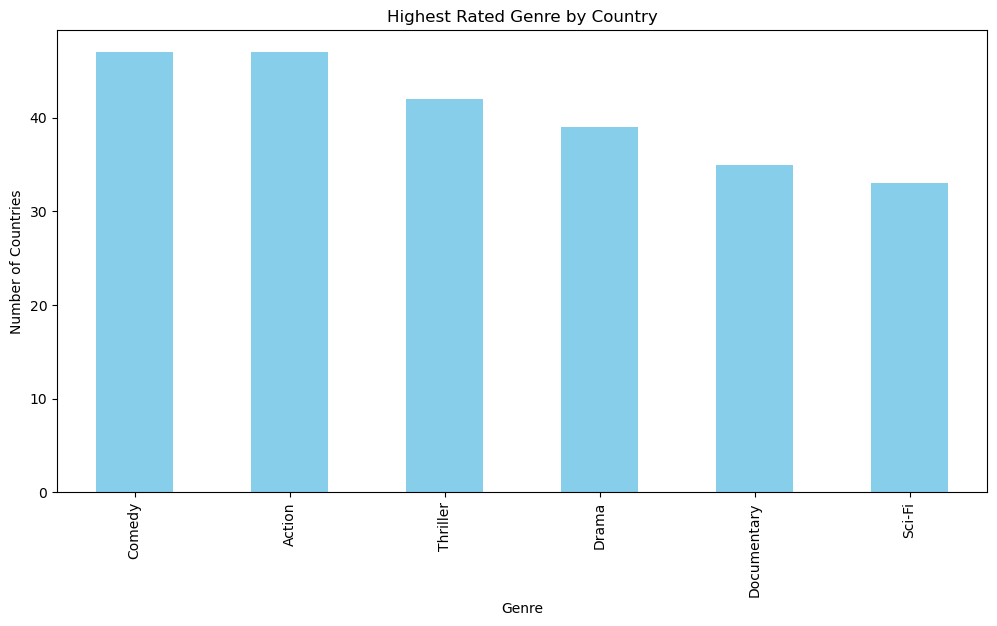

In [27]:
# Group by 'Country' and find the genre with the maximum 'Ratings' in each group
country_highest_genre = df.groupby('Country')['Genre'].agg(lambda x: x.loc[df.loc[x.index, 'Ratings'].idxmax()])

print(country_highest_genre)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
country_highest_genre.value_counts().plot(kind='bar', color='skyblue')
plt.title("Highest Rated Genre by Country")
plt.xlabel("Genre")
plt.ylabel("Number of Countries")
plt.show()

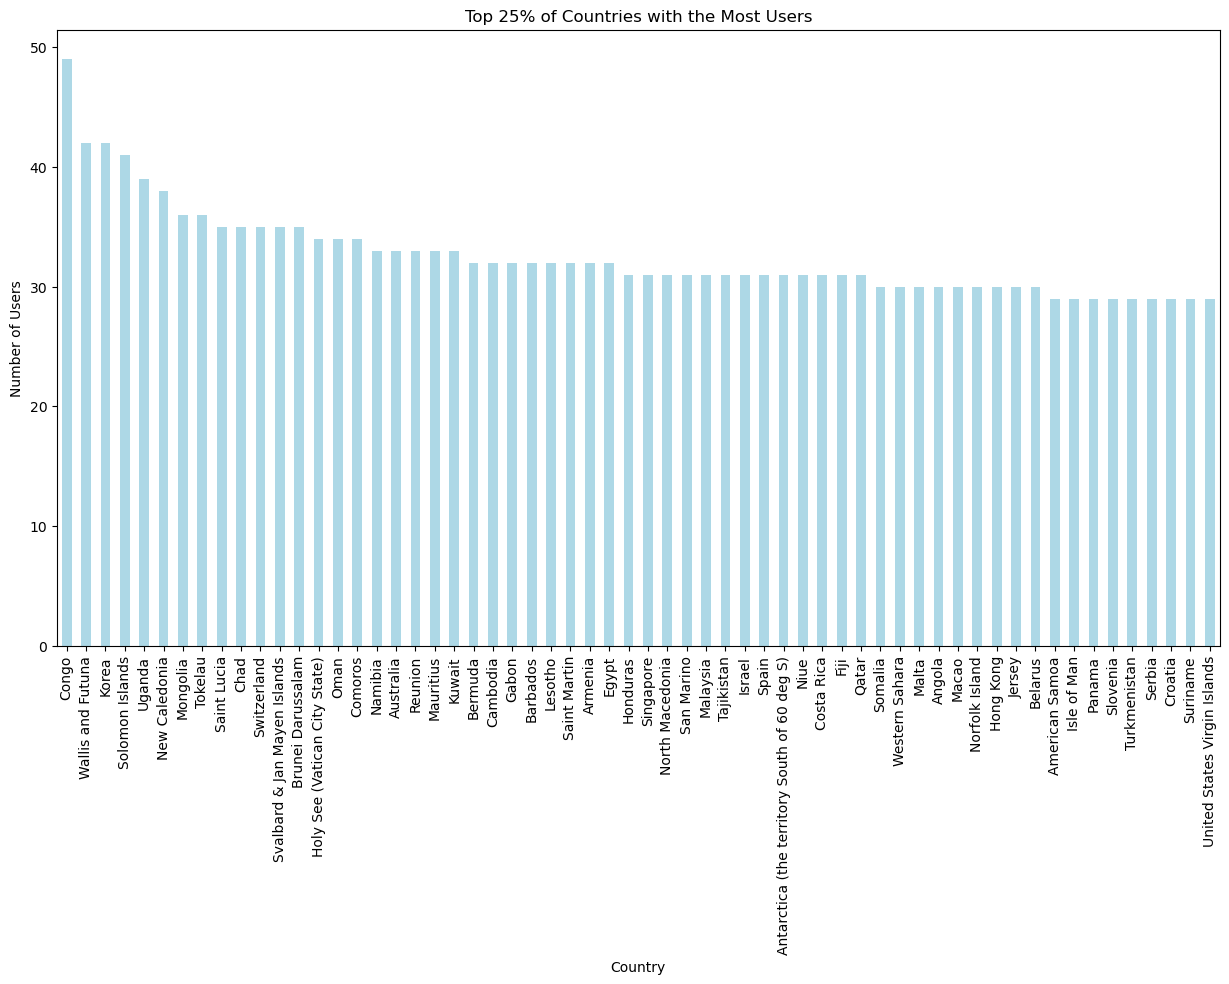

In [28]:
# Count the number of users for each country
users_by_country = df['Country'].value_counts()

# Select the top 25% of countries
top_countries = users_by_country.head(int(len(users_by_country) * 0.25))

# Plotting the bar chart with a larger figure size
plt.figure(figsize=(15, 8))
top_countries.plot(kind='bar', color='lightblue')
plt.title("Top 25% of Countries with the Most Users")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.show()


In [29]:
unique_values = df['Country'].unique()
print(unique_values)

print(len(unique_values))


['Sudan' 'Cuba' 'Japan' "Lao People's Democratic Republic" 'Bangladesh'
 'Tokelau' 'Guyana' 'Guinea' 'Palau' 'Ecuador' 'Iceland' 'Colombia'
 'Dominican Republic' 'Georgia' 'Malaysia' 'Togo' 'Iran' 'Estonia' 'Korea'
 'Lebanon' 'Trinidad and Tobago' 'Saint Vincent and the Grenadines'
 'Belarus' 'Northern Mariana Islands' 'Jersey' 'Niue' 'Lesotho' 'Anguilla'
 'Romania' 'Uganda' 'Comoros' 'Austria' 'Paraguay' 'Angola' 'Philippines'
 'Cambodia' 'Benin' 'Yemen' 'Luxembourg' 'Malawi'
 'Heard Island and McDonald Islands' 'Wallis and Futuna' 'Macao'
 'Honduras' 'Liechtenstein' 'Uruguay' 'Cameroon' 'Cape Verde' 'San Marino'
 'Guadeloupe' 'Dominica' 'Egypt' 'Jamaica' 'Portugal' 'French Polynesia'
 'Gambia' 'Niger' 'Fiji' 'United States Virgin Islands' 'Aruba'
 'French Southern Territories' 'China' 'Sweden' "Cote d'Ivoire"
 'Saudi Arabia' 'Croatia' 'Barbados' 'Turkmenistan'
 'Falkland Islands (Malvinas)' 'Sierra Leone' 'Venezuela' 'South Africa'
 'Denmark' 'Tanzania' 'Bolivia'
 'South Georgia and 

Ideas

- Analyze user demographics based on geographical location. Explore which regions or countries have the highest concentration of Streaming Application users and whether there are regional preferences in terms of content.

Ideas to Improve Code

Functions

Notes of What I have Learned

- Always know what are all the options that a column can have for a value
- Always know the data type that the values of the column you are working with are, ex. make sure numbers are not strings
- Do not make a column of numbers a string in the database lol
- Check datatypes of dataframe after creating it from tuples converted to arrays to df
- Reminded of Mean, Median, Mode, Range, Variance, Standard Deviation, Quartiles, Interquartile Range (IQR), Skewness, Kurtosis (look at box & whisker plot)
- What a pandas series and groupby object is